In [90]:
import numpy as np
from matplotlib import pyplot as plt
import os

from sklearn.svm import SVC
from sklearn import datasets

%matplotlib inline

In [91]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [92]:
# Plot the data

def plot_setosa_versicolor(X = X, y = y):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo', label='iris setosa')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^', label='iris verticolor')

    plt.xlabel('petal length', fontsize=15)
    plt.ylabel('petal width', fontsize=15)
    plt.legend()

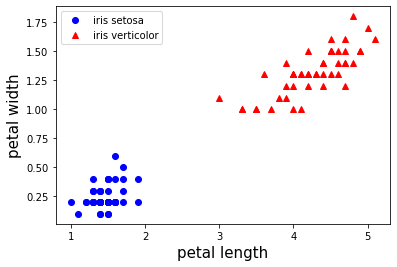

In [93]:
plot_setosa_versicolor()

**EXERCISE 8**

Train LinearSVC on linearly seperable data, then train SVC and SGCClassifier and compare

In [96]:
def plot_decision_boundary(pipeline, X=X, y=y):
    # Get params for our decision boundary
    transfX = pipeline['scaler'].fit_transform(X)

    Xmin = transfX.min()
    Xmax = transfX.max()

    b = pipeline['clf'].intercept_
    w0 = pipeline['clf'].coef_[0][0]
    w1 = pipeline['clf'].coef_[0][1]

    # get our input values to build line
    x0 = np.linspace(Xmin, Xmax, 200)

    # Setup boundary
    # b + w0x + w1y = 0  ==> y = -w0/w1 * x - b/w1
    boundary = -(w0/w1) * x0 - b/w1
    margin = 1/w1
    top_gutter = boundary + margin
    bot_gutter = boundary - margin

    # Plot our boundary and gutters
    plt.plot(x0, boundary, 'k-')
    plt.plot(x0, top_gutter, 'r--')
    plt.plot(x0, bot_gutter, 'b--')

In [99]:
# Preprocess the data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

Linear_SVM_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC()) 
])

Linear_SVM_clf.fit(X, y)

1.0

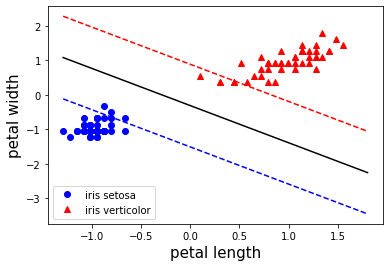

In [97]:
plot_setosa_versicolor(X = transfX)
plot_decision_boundary(Linear_SVM_clf)

In [105]:
from sklearn.svm import SVC

SVC_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear')) 
])

SVC_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

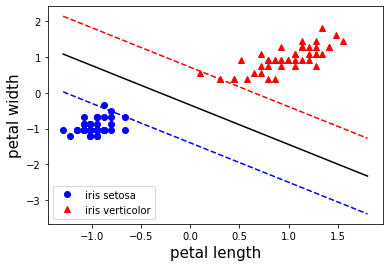

In [106]:
plot_setosa_versicolor(X = transfX)
plot_decision_boundary(SVC_clf)

In [110]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001,
                        max_iter=1000, tol=1e-3, random_state=42)) 
])

sgd_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.001,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

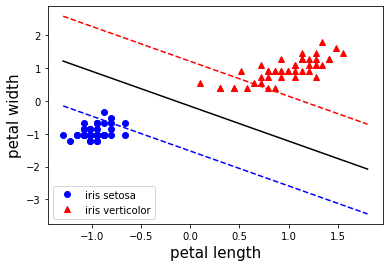

In [111]:
plot_setosa_versicolor(X = transfX)
plot_decision_boundary(sgd_clf)

**EXERCISE 10**

Train SVR on California Housing Dataset

In [130]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
X.shape

(20640, 8)

In [133]:
from sklearn.svm import SVR

SVR_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])

SVR_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [134]:
SVR_model.score(X_test, y_test)

0.7275639524733043

In [135]:
from sklearn.metrics import mean_squared_error
y_pred = SVR_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.3570026426754465
0.5974969813107398


In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

SVR_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])

param_dists = {
    'model__gamma': reciprocal(0.001, 0.1),
    'model__C': uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(SVR_model, param_dists, verbose=2, cv=3)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] model__C=8.732501769442347, model__gamma=0.014138684138012492 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__C=8.732501769442347, model__gamma=0.014138684138012492, total=  10.9s
[CV] model__C=8.732501769442347, model__gamma=0.014138684138012492 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  model__C=8.732501769442347, model__gamma=0.014138684138012492, total=  10.7s
[CV] model__C=8.732501769442347, model__gamma=0.014138684138012492 ...
[CV]  model__C=8.732501769442347, model__gamma=0.014138684138012492, total=  10.9s
[CV] model__C=10.6073996426796, model__gamma=0.0010782720368618492 ...
[CV]  model__C=10.6073996426796, model__gamma=0.0010782720368618492, total=  10.1s
[CV] model__C=10.6073996426796, model__gamma=0.0010782720368618492 ...
[CV]  model__C=10.6073996426796, model__gamma=0.0010782720368618492, total=  10.1s
[CV] model__C=10.6073996426796, model__gamma=0.0010782720368618492 ...
[CV]  model__C=10.6073996426796, model__gamma=0.0010782720368618492, total=  10.0s
[CV] model__C=5.173843032530275, model__gamma=0.03912018707260784 ....
[CV]  model__C=5.173843032530275, model__gamma=0.03912018707260784, total=  11.1s
[CV] model__C=5.173843032530275, model__gamma=0.03912018707260784 ....
[CV]  model__C=5.173843032530275, model__gamma=0.03912018707260784, total=  1

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              SVR(C=1.0, cache_size=200,
                                                  coef0=0.0, degree=3,
                                                  epsilon=0.1, gamma='scale',
                                                  kernel='rbf', max_iter=-1,
                                                  shrinking=True, tol=0.001,
                                                  verbose=False))],
                                      verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
          

In [137]:
rnd_search_cv.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=5.908725733130206, cache_size=200, coef0=0.0, degree=3,
                     epsilon=0.1, gamma=0.04722302780443009, kernel='rbf',
                     max_iter=-1, shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [138]:
y_pred = rnd_search_cv.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

# Note that our original model performed better thanks to its gamma = 'auto' default option
# To improce performance, further tuning of gamma would be required

0.37646952041010656
0.6135711209062129
